In [1]:
import sys
sys.path.insert(0, '../Utilities')

from collections import defaultdict
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import colorcet as cc

import networkx as nx
from networkx.algorithms import bipartite

import hypergraphx as hx
from hypergraphx.core.hypergraph import Hypergraph
from hypergraphx.representations.projections import bipartite_projection
from hypergraphx.generation.random import random_hypergraph

# Created functions
from utilities_fibration import *
from trajectories_kuramoto_hoi import *
from find_sync_clusters_from_trajectories import *

# Datasets
import xgi

import matplotlib as mpl
mpl.rcParams['text.usetex'] = True

mpl.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",  # use serif font
    "text.latex.preamble": r"\usepackage{lmodern}",  # match LaTeX document font
})

In [2]:
# Diseasome dataset

hg = 'diseasome'#'plant-pollinator-mpl-015'#'plant-pollinator-mpl-015'

H = xgi.load_xgi_data(hg)
H.cleanup(singletons=False, isolates=False, connected= True, relabel=False)

num_nodes = H.num_nodes
num_edges = H.num_edges

print(f'num_nodes: {num_nodes}')
print(f'num_edges: {num_edges}')

num_nodes: 516
num_edges: 314


In [3]:
# Use hypegraphx to have the same format of other simulations
# Need to find hyperedges

edges_dictionary = H.edges.members(dtype=dict)
print(list(edges_dictionary.items()))
hyperedge_list = [v for k,v in edges_dictionary.items()]

[('3211', {'1285', '858'}), ('2914', {'81', '468'}), ('3825', {'411', '416', '417'}), ('2566', {'127', '126', '125'}), ('3831', {'288', '293', '292', '290', '291', '289'}), ('2203', {'407', '306', '408', '409'}), ('3720', {'476', '475', '474', '477', '479', '478', '114', '473'}), ('2851', {'282', '607'}), ('2814', {'110', '686'}), ('3609', {'579', '575', '576', '577', '578', '574'}), ('3160', {'199', '114', '200', '201'}), ('3161', {'199', '201'}), ('3248', {'117', '199', '384', '197'}), ('3292', {'199', '868', '364'}), ('3780', {'117', '112', '118', '116', '114', '115', '113'}), ('2309', {'117', '114', '113'}), ('3571', {'63', '62'}), ('3931', {'815', '924', '925', '634', '923'}), ('1631', {'48', '542'}), ('2105', {'120', '466', '467'}), ('3730', {'239', '466', '467'}), ('3712', {'77', '78', '55'}), ('3830', {'782', '856'}), ('3554', {'130', '643', '645', '644', '189'}), ('2974', {'186', '545', '185'}), ('1515', {'68', '664'}), ('2966', {'158', '157'}), ('3553', {'129', '128', '30', '

In [4]:
hyperedge_list

[{'1285', '858'},
 {'468', '81'},
 {'411', '416', '417'},
 {'125', '126', '127'},
 {'288', '289', '290', '291', '292', '293'},
 {'306', '407', '408', '409'},
 {'114', '473', '474', '475', '476', '477', '478', '479'},
 {'282', '607'},
 {'110', '686'},
 {'574', '575', '576', '577', '578', '579'},
 {'114', '199', '200', '201'},
 {'199', '201'},
 {'117', '197', '199', '384'},
 {'199', '364', '868'},
 {'112', '113', '114', '115', '116', '117', '118'},
 {'113', '114', '117'},
 {'62', '63'},
 {'634', '815', '923', '924', '925'},
 {'48', '542'},
 {'120', '466', '467'},
 {'239', '466', '467'},
 {'55', '77', '78'},
 {'782', '856'},
 {'130', '189', '643', '644', '645'},
 {'185', '186', '545'},
 {'664', '68'},
 {'157', '158'},
 {'128', '129', '30', '99'},
 {'120', '130', '30'},
 {'30', '365', '366', '80', '87', '99'},
 {'30', '792'},
 {'30', '65', '841', '842'},
 {'30', '751', '935'},
 {'1080', '1081', '1082', '120'},
 {'120', '121', '122', '123', '124'},
 {'367', '368'},
 {'140', '367'},
 {'1270'

In [5]:
edge_list_sc_filtered = normalize_sequence(hyperedge_list)
edge_list_sc_filtered = edge_list_sc_filtered[0]

In [6]:
hyg = Hypergraph(edge_list_sc_filtered)

In [7]:
# Transform to bipartite graph

G  = bipartite_projection(hyg)
bsc = G[0]
color_dict_iter = bipartite.color(G[0])

# Find the colors (fibres)
result_sc = kameicock_coloring(G[0], color_dict_iter)

nodes_layer1 = [n for n, l in color_dict_iter.items() if l == 1]
nodes_coloring = {n: c for n, c in result_sc.items() if n in nodes_layer1}

cl_hg = []
for val in set(nodes_coloring.values()):
    cl_hg.append([k for k, v in nodes_coloring.items() if v == val])

print(f'n nodi layer 1: {len(nodes_layer1)}')
print(f'ratio nodes/clusters: {len(nodes_layer1)/len(cl_hg)}')

c = [e for e in cl_hg if len(e) > 1]
print(f'Number of non trivial clusters: {len(c)}')
print('**************************\n')

n nodi layer 1: 516
ratio nodes/clusters: 1.4576271186440677
Number of non trivial clusters: 94
**************************



In [8]:
edge_name_dict = G[1]
edge_col_dict = nodes_coloring

dic = {int(v): edge_col_dict[k] for k, v in edge_name_dict.items() if k.startswith('N')}

# Transform the list of the node cluster substituting with the original names
clusters = [[edge_name_dict[item] for item in sublist] for sublist in cl_hg]    
print(clusters)  
print(len(clusters))

[[43, 44], [197], [490, 491], [354, 356], [475], [334], [213], [315], [320, 321, 322, 323, 324], [59, 438, 133], [398], [28], [137, 360], [38], [343], [459], [190, 191], [145, 146], [458], [503, 504, 505, 507], [423, 424, 425, 426], [116], [416], [176, 465], [216], [185], [195], [107, 108, 244, 245], [60], [358], [327], [275], [157, 158], [241], [84, 85, 86], [50], [219], [58], [19], [204, 212, 222], [118], [248], [286], [236, 435], [436, 437], [388, 389, 390], [225], [138], [487, 488], [5, 6], [357], [192], [256], [46], [169], [104], [149], [383], [514], [37, 39, 40, 41], [79, 82], [243], [400], [142], [127], [89], [373], [97], [233], [273], [203], [64], [167], [140], [477], [242, 263], [467], [113], [353], [32], [134], [445], [91], [15], [468], [10], [429, 430], [196], [370], [283], [56], [292, 293], [396], [100], [411], [231], [339], [335], [258], [337], [406], [66], [194], [351], [494], [235], [510], [317], [8], [355], [252], [336], [159, 161, 500, 501, 502], [409], [478], [61], [3

In [9]:
clusters

[[43, 44],
 [197],
 [490, 491],
 [354, 356],
 [475],
 [334],
 [213],
 [315],
 [320, 321, 322, 323, 324],
 [59, 438, 133],
 [398],
 [28],
 [137, 360],
 [38],
 [343],
 [459],
 [190, 191],
 [145, 146],
 [458],
 [503, 504, 505, 507],
 [423, 424, 425, 426],
 [116],
 [416],
 [176, 465],
 [216],
 [185],
 [195],
 [107, 108, 244, 245],
 [60],
 [358],
 [327],
 [275],
 [157, 158],
 [241],
 [84, 85, 86],
 [50],
 [219],
 [58],
 [19],
 [204, 212, 222],
 [118],
 [248],
 [286],
 [236, 435],
 [436, 437],
 [388, 389, 390],
 [225],
 [138],
 [487, 488],
 [5, 6],
 [357],
 [192],
 [256],
 [46],
 [169],
 [104],
 [149],
 [383],
 [514],
 [37, 39, 40, 41],
 [79, 82],
 [243],
 [400],
 [142],
 [127],
 [89],
 [373],
 [97],
 [233],
 [273],
 [203],
 [64],
 [167],
 [140],
 [477],
 [242, 263],
 [467],
 [113],
 [353],
 [32],
 [134],
 [445],
 [91],
 [15],
 [468],
 [10],
 [429, 430],
 [196],
 [370],
 [283],
 [56],
 [292, 293],
 [396],
 [100],
 [411],
 [231],
 [339],
 [335],
 [258],
 [337],
 [406],
 [66],
 [194],
 [351],


In [10]:
# Ratio nodes/cluster
nodes_list = hyg.get_nodes()
len(nodes_list)/len(clusters)

1.4576271186440677

In [11]:
nontrivial_clusters = [e for e in clusters if len(e) > 1]
len(nontrivial_clusters)

94

**Compute trajectories on the multigraph for the Kuramoto model with frustration parameters**

It is not the Kuramoto model with 2 and 3 body interactions but a generalization with a coupling function considering all the higher-order interactions at the same time because the rank of the diseasome is 11.

$$\dot{\theta}_i = \omega_i + \sum\limits_{m=2}^{rk(H)}\sigma_m\sum\limits_{e\in \mathcal{E}^{(m)}} [I^{(m)}]_{i,e} \sin{\Big(\sum_{j \in e\setminus \{i\}}\theta_j - (m-1) \theta_{i} -\alpha^{(m)} \Big)}$$

In [ ]:
# Compute trajectories on the multigraph for the Kuramoto model with frustration parameters
# Fix initial conditions
# It is not the Kuramoto model with 2 and 3 body interactions but a generalization with a coupling function considering all the higher-order interactions at the same time because the rank of the diseasome is 11.

# Number of nodes
nodes_list = hyg.get_nodes()
N = len(nodes_list)

# Natural frequencies
omega = np.zeros(N)

# Initial conditions
IC = np.ones(N)

# Coupling strengths
max_len = max(len(e) for e in edge_list_sc_filtered)
sigma_list = list(0.4*np.ones(max_len))

In [13]:
# Integrate and plot phase
T_max = 1000
step = 1
repetition = T_max/step
# simulate
model = KuramotoHypergraph(edge_list_sc_filtered, omega, sigma_list, list(np.pi/6*np.ones(len(sigma_list))))
t, theta_history = model.simulate(T=repetition, dt=step, initial_conditions=IC)


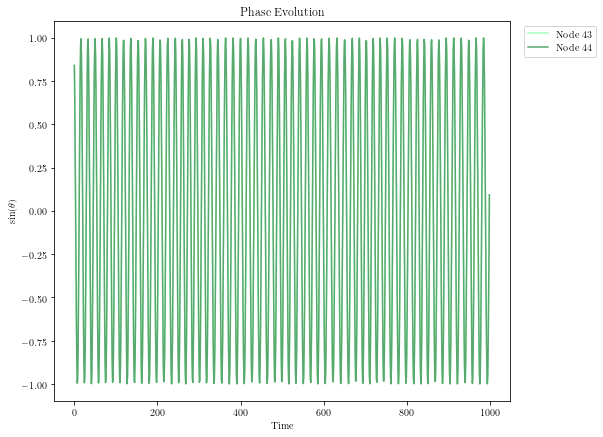

In [14]:
# Plot results for some random nodes in the same fibre

plt.figure(figsize=(18, 7))

plt.subplot(121)

colors = sns.color_palette(cc.glasbey_cool[2:], N)

# CLusters with more than one nodes
c = [e for e in clusters if len(e) > 1]

for i in c[0]:#range(N):
    plt.plot(t, np.sin(theta_history[:,i]), label=f'Node {i}', color = colors[i])
plt.xlabel('Time')
plt.ylabel(r'$\sin(\theta)$')
plt.title('Phase Evolution')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')

#
#
#### plt.grid(False)
#plt.savefig('Images/Phase_space_6_nodes_rombo_5_clusters_0.8.png', dpi=300, bbox_inches='tight')    


In [15]:
# Compute max diff in each cluster
cluster_states = []
for cluster in clusters:
    arrays = theta_history[:,[i for i in cluster]]
    min_vals = np.min(arrays, axis=1) 
    max_vals = np.max(arrays, axis=1) 
    cluster_states.append(abs(max_vals - min_vals))
cluster_states = np.array(cluster_states) 

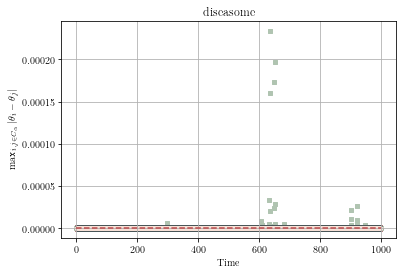

In [16]:
num_nontrivial_clusters = len(c)
#cluster_colors = sns.color_palette(cc.glasbey_cool[20:], num_nontrivial_clusters)
cluster_colors = ['#ebcb8b','#003049','#d62828','#4c566a','#a3be8c','#fcbf49','#778da9', '#b0c4b1','#4a5759', '#f7e1d7','#14213d','#f77f00']
markers = ['s', "o", "d", '*', "v", "^", 'o', "s", "d", '*', "v", "^",]

#plt.figsize=(15, 30)

# Plot the synchronization error

i = 0
for cluster_i, max_diff in enumerate(cluster_states):
    if len(clusters[cluster_i]) > 1:
        plt.scatter(t, max_diff, marker=markers[i%12], s=16, color=cluster_colors[i%12], label=f'Cluster {cluster_i}: {clusters[cluster_i]}')#, edgecolors='black', linewidths = 0.1,
        i += 1

plt.hlines(y = 0, xmin = t[0], xmax = t[-1], color='#bc4749', linestyle = '--')



plt.xlabel('Time')
label = r'$\max_{i,j \in C_\alpha} \vert \theta_i - \theta_j \vert$'
plt.ylabel(label)
#plt.legend(loc='upper right', ncol=1)
plt.tick_params(axis='both', which='major')
plt.title(f'{hg}')# $\sigma_2 = {sigma2}, \sigma_3 = {sigma3}$')
plt.grid()
#plt.ylim(-0.01, delta + 0.05)
#plt.savefig(f'Images/Real_datasets/Bound_test_{hg}_{sigma2}_{sigma3}_{N}_nodi_delta_pi{den}.png', dpi=300, bbox_inches='tight')
#plt.ylim(0, 0.0001)

Cluster [43, 44]: 1.0
Cluster [490, 491]: 1.0
Cluster [354, 356]: 1.0
Cluster [320, 321, 322, 323, 324]: 1.0
Cluster [59, 438, 133]: 1.0
Cluster [137, 360]: 1.0
Cluster [190, 191]: 1.0
Cluster [145, 146]: 1.0
Cluster [503, 504, 505, 507]: 1.0
Cluster [423, 424, 425, 426]: 1.0
Cluster [176, 465]: 1.0
Cluster [107, 108, 244, 245]: 1.0
Cluster [157, 158]: 1.0
Cluster [84, 85, 86]: 1.0
Cluster [204, 212, 222]: 1.0
Cluster [236, 435]: 1.0
Cluster [436, 437]: 1.0
Cluster [388, 389, 390]: 1.0
Cluster [487, 488]: 1.0
Cluster [5, 6]: 1.0
Cluster [37, 39, 40, 41]: 1.0
Cluster [79, 82]: 1.0
Cluster [242, 263]: 1.0
Cluster [429, 430]: 1.0
Cluster [292, 293]: 1.0
Cluster [159, 161, 500, 501, 502]: 1.0
Cluster [304, 92, 495]: 1.0
Cluster [151, 352]: 1.0
Cluster [16, 498]: 1.0
Cluster [193, 47]: 1.0
Cluster [87, 88]: 1.0
Cluster [130, 131]: 1.0
Cluster [299, 300, 483, 484]: 1.0
Cluster [288, 290]: 1.0
Cluster [33, 247]: 1.0
Cluster [333, 486]: 1.0
Cluster [214, 215, 228, 229, 460, 461]: 1.0
Cluster [

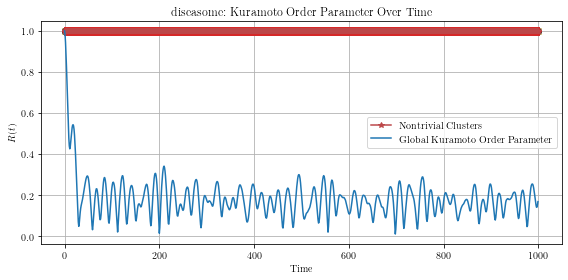

In [17]:
# Plot
plt.figure(figsize=(8, 4))

i = 0
# Example usage (assuming theta is already defined):
for idx, cluster in enumerate(c):
    arrays = theta_history[:,[i for i in cluster]]
    R = kuramoto_order_parameter_over_time(arrays)
    print(f'Cluster {cluster}: {np.sum(R) / (T_max/step)}')    
    
    if idx == len(c)-1:
        plt.plot(R, marker=markers[i%5], color='#bc4749', label=f'Nontrivial Clusters')
    else:
        plt.plot(R, marker=markers[i%5], color=cluster_colors[i%5])
    

    i += 1

arrays = theta_history[:,]
R_tot = kuramoto_order_parameter_over_time(arrays)
plt.plot(R_tot, label='Global Kuramoto Order Parameter')
print(f'Global parameter: {np.sum(R_tot) / (T_max/step)}')


plt.xlabel('Time')
plt.ylabel('$R(t)$')
plt.title(f'{hg}: Kuramoto Order Parameter Over Time')
plt.grid(True)
if len(c) < 15:
    plt.legend()
plt.legend()    
plt.tight_layout()


#plt.savefig(f'Images/Frustration_results/Order_parameters_time_from_real_{hg}', dpi=300, transparent=True)
